# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [113]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [68]:
print(cities)

['tessalit', 'attawapiskat', 'aitape', 'cayenne', 'lompoc', 'busselton', 'hobart', 'san policarpo', 'bandarbeyla', 'bluff', 'awjilah', 'sur', 'lorengau', 'kamenskoye', 'acapulco', 'ribeira grande', 'salalah', 'lebu', 'te anau', 'port alfred', 'khatanga', 'pimentel', 'grand gaube', 'albany', 'the valley', 'chadan', 'eyl', 'nerja', 'nizhneyansk', 'qaanaaq', 'cap malheureux', 'hilo', 'coahuayana', 'zhigansk', 'faya', 'georgetown', 'kahului', 'tanete', 'cape town', 'bayan', 'adrar', 'rikitea', 'marabba', 'hasaki', 'komsomolskiy', 'tasiilaq', 'harwich', 'aksu', 'bethel', 'deputatskiy', 'lata', 'meyungs', 'gisborne', 'yar-sale', 'mataura', 'macusani', 'huanren', 'jamestown', 'dikson', 'gornyy', 'avarua', 'provideniya', 'bonavista', 'krasnoselkup', 'fort nelson', 'barrow', 'torata', 'ushuaia', 'kaitangata', 'muros', 'punta arenas', 'taolanaro', 'santo tomas', 'souillac', 'sangar', 'bichena', 'hermanus', 'natalio', 'katsuura', 'vaini', 'diffa', 'thompson', 'vargem grande do sul', 'lumeje', 'ud

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
cities_new = cities.copy()
lon = []
lat = []
ID = []
temp = []
cloudiness = []
Country = []
Date = []
Humidity = []
Wind_speed = []
cities_to_remove = []

for n in range(len(cities_new)):
    try:
        city_name = cities_new[n]
        response = requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}')
        response=response.json()
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        ID.append(response['id'])
        temp.append(response['main']['temp'])
        cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Wind_speed.append(response['wind']['speed'])
        time.sleep(1.1)
    except:
        cities_to_remove.append(city_name)
        pass
for city in cities_to_remove:
    cities_new.remove(city)

Dict = {'City': cities_new, 'ID': ID, 'Country': Country, 'latitude': lat, 'longitude': lon, 'Date': Date, 'Temperature': temp, 'Cloudiness': cloudiness, 'Humidity': Humidity, 'Wind Speed': Wind_speed }   
Df = pd.DataFrame(Dict)
Df

In [71]:
print(cities)

['tessalit', 'attawapiskat', 'aitape', 'cayenne', 'lompoc', 'busselton', 'hobart', 'san policarpo', 'bandarbeyla', 'bluff', 'awjilah', 'sur', 'lorengau', 'kamenskoye', 'acapulco', 'ribeira grande', 'salalah', 'lebu', 'te anau', 'port alfred', 'khatanga', 'pimentel', 'grand gaube', 'albany', 'the valley', 'chadan', 'eyl', 'nerja', 'nizhneyansk', 'qaanaaq', 'cap malheureux', 'hilo', 'coahuayana', 'zhigansk', 'faya', 'georgetown', 'kahului', 'tanete', 'cape town', 'bayan', 'adrar', 'rikitea', 'marabba', 'hasaki', 'komsomolskiy', 'tasiilaq', 'harwich', 'aksu', 'bethel', 'deputatskiy', 'lata', 'meyungs', 'gisborne', 'yar-sale', 'mataura', 'macusani', 'huanren', 'jamestown', 'dikson', 'gornyy', 'avarua', 'provideniya', 'bonavista', 'krasnoselkup', 'fort nelson', 'barrow', 'torata', 'ushuaia', 'kaitangata', 'muros', 'punta arenas', 'taolanaro', 'santo tomas', 'souillac', 'sangar', 'bichena', 'hermanus', 'natalio', 'katsuura', 'vaini', 'diffa', 'thompson', 'vargem grande do sul', 'lumeje', 'ud

In [74]:
print
city_name= cities[0]
response = requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}')
response=response.json()
print(response)

{'cod': 429, 'message': 'Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription http://openweathermap.org/price'}


In [41]:
print(len(lon))

15


<Response [404]>


In [19]:
print(response)

{'coord': {'lon': -68.54, 'lat': -31.54}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 293.83, 'feels_like': 291.28, 'temp_min': 293.83, 'temp_max': 293.83, 'pressure': 1016, 'humidity': 48, 'sea_level': 1016, 'grnd_level': 943}, 'wind': {'speed': 3.43, 'deg': 153}, 'clouds': {'all': 75}, 'dt': 1587940443, 'sys': {'country': 'AR', 'sunrise': 1587898929, 'sunset': 1587938477}, 'timezone': -10800, 'id': 3837213, 'name': 'San Juan', 'cod': 200}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [76]:
Df.to_csv(index=False)


'City,ID,Country,latitude,longitude,Date,Temperature,Cloudiness,Humidity,Wind Speed\ntessalit,2449893,ML,20.2,1.01,1587949132,302.36,20,13,4.61\naitape,2101169,PG,-3.14,142.35,1587949133,301.82,100,74,1.73\ncayenne,3382160,GF,4.93,-52.33,1587949134,298.15,90,100,3.94\nlompoc,5367788,US,34.64,-120.46,1587949136,292.3,1,68,7.7\nbusselton,2075265,AU,-33.65,115.33,1587949137,284.22,9,98,0.89\nhobart,2163355,AU,-42.88,147.33,1587948879,289.11,75,48,7.2\nsan policarpo,1688696,PH,12.18,125.51,1587949139,300.77,97,84,5.74\nbandarbeyla,64814,SO,9.49,50.81,1587949140,301.37,49,76,2.96\nbluff,2206939,NZ,-46.6,168.33,1587949015,286.48,94,77,5.36\nawjilah,88533,LY,29.11,21.29,1587949143,299.01,2,23,6.45\nsur,286245,OM,22.57,59.53,1587949144,303.55,0,41,5.29\nlorengau,2092164,PG,-2.02,147.27,1587949145,302.53,67,75,3.05\nacapulco,3533462,MX,16.86,-99.89,1587949108,301.15,20,69,2.1\nribeira grande,3372707,PT,38.52,-28.7,1587949147,287.12,100,62,1.92\nsalalah,286621,OM,17.02,54.09,1587949149,301.15,20

In [58]:
Df

,City,ID,Country,latitude,longitude,Date,Temperature,Cloudiness,Humidity,Wind Speed


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

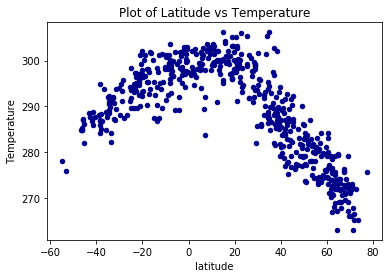

In [51]:
Lat_Temp = Df.plot.scatter(x='latitude',
                      y='Temperature',
                      c='DarkBlue', 
                          title = 'Plot of Latitude vs Temperature')

#### Latitude vs. Humidity Plot

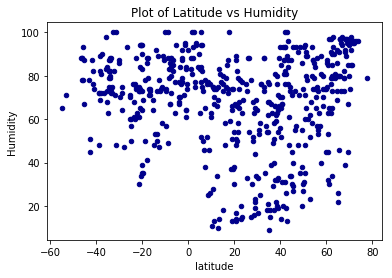

In [52]:
Lat_Humidity = Df.plot.scatter(x='latitude',
                      y='Humidity',
                      c='DarkBlue', 
                          title = 'Plot of Latitude vs Humidity')

#### Latitude vs. Cloudiness Plot

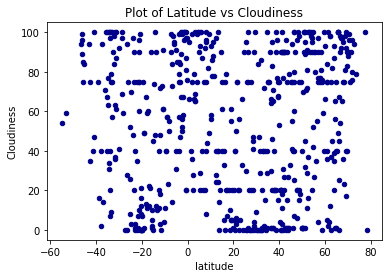

In [77]:
Lat_Cloudiness = Df.plot.scatter(x='latitude',
                      y='Cloudiness',
                      c='DarkBlue', 
                          title = 'Plot of Latitude vs Cloudiness')

#### Latitude vs. Wind Speed Plot

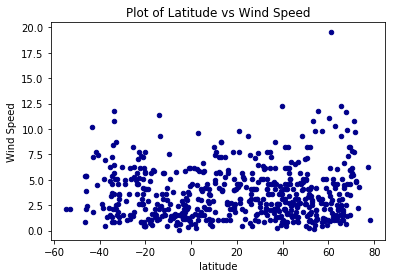

In [78]:
Lat_Cloudiness = Df.plot.scatter(x='latitude',
                      y='Wind Speed',
                      c='DarkBlue', 
                          title = 'Plot of Latitude vs Wind Speed')

## Linear Regression

In [102]:
# OPTIONAL: Create a function to create Linear Regression plots
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

def linear_regression(df, x, y):
# Load the dataset
    X_axcis_original = df[x]
    Y_axcis_original = df[y]

    X_axcis = X_axcis_original.values.reshape(-1, 1)
    Y_axcis = Y_axcis_original.values.reshape(-1, 1)
# Split the data into training/testing sets
    X_axcis_train = X_axcis[:-20]
    X_axcis_test = X_axcis[-20:]

# Split the targets into training/testing sets
    Y_axcis_train = Y_axcis[:-20]
    Y_axcis_test = Y_axcis[-20:]

# Create linear regression object
    regr = linear_model.LinearRegression()

# Train the model using the training sets
    regr.fit(X_axcis_train, Y_axcis_train)

# Make predictions using the testing set
    y_pred = regr.predict(X_axcis_test)
    y_pred_all = regr.predict(X_axcis)
# The coefficients
    print('Coefficients: \n', regr.coef_)
# The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(Y_axcis_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(Y_axcis_test, y_pred))

# Plot outputs
    plt.scatter(X_axcis,Y_axcis ,  color='black')
    plt.plot(X_axcis, y_pred_all, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

In [80]:
# Create Northern and Southern Hemisphere DataFrames
Df_North = Df[Df['longitude']>0]
Df_South = Df[Df['longitude']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Coefficients: 
 [[-0.21464887]]
Mean squared error: 49.79
Coefficient of determination: 0.16


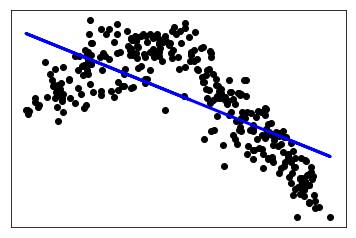

In [103]:
linear_regression(Df_North, 'latitude', 'Temperature')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Coefficients: 
 [[-0.16953]]
Mean squared error: 40.74
Coefficient of determination: 0.37


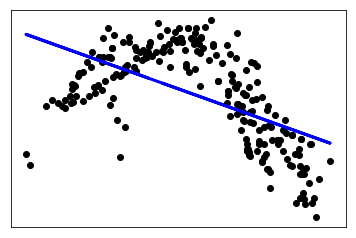

In [104]:
linear_regression(Df_South, 'latitude', 'Temperature')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Coefficients: 
 [[0.02992591]]
Mean squared error: 307.95
Coefficient of determination: -0.08


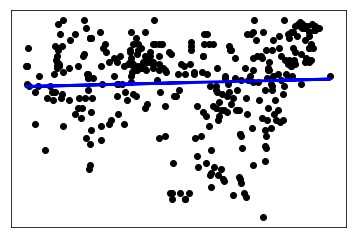

In [105]:
linear_regression(Df_North, 'latitude', 'Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Coefficients: 
 [[-0.1534662]]
Mean squared error: 300.49
Coefficient of determination: 0.11


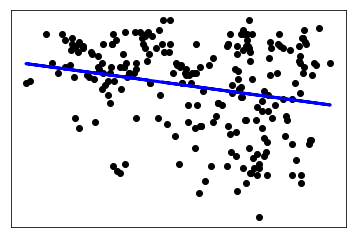

In [106]:
linear_regression(Df_South, 'latitude', 'Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Coefficients: 
 [[0.05218021]]
Mean squared error: 1564.21
Coefficient of determination: -0.04


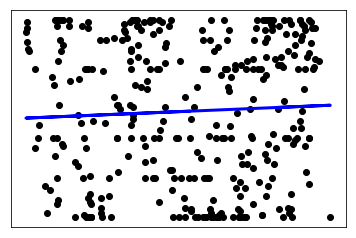

In [107]:
linear_regression(Df_North, 'latitude', 'Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Coefficients: 
 [[-0.00494133]]
Mean squared error: 806.83
Coefficient of determination: -0.50


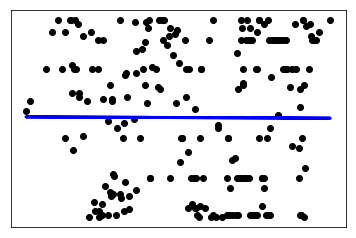

In [108]:
linear_regression(Df_South, 'latitude', 'Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Coefficients: 
 [[-0.00262983]]
Mean squared error: 3.72
Coefficient of determination: 0.02


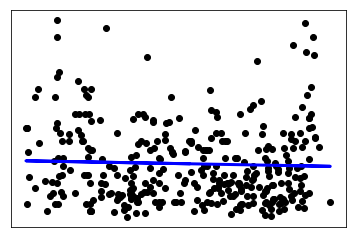

In [109]:
linear_regression(Df_North, 'latitude', 'Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Coefficients: 
 [[0.01180739]]
Mean squared error: 6.96
Coefficient of determination: 0.14


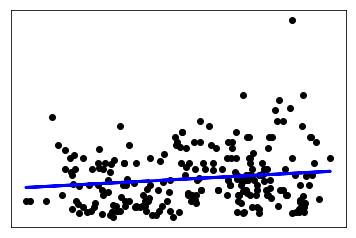

In [110]:
linear_regression(Df_South, 'latitude', 'Wind Speed')